In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r'C:\Users\nacho\OneDrive - University of Birmingham\DATA SCIENCE\Summer Project\all_player_data.csv'
df = pd.read_csv(file_path)

C:\Users\nacho\anaconda\envs\notebook-6.1.5\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


C:\Users\nacho\anaconda\envs\notebook-6.1.5\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(



=== LEFT WINGERS ===


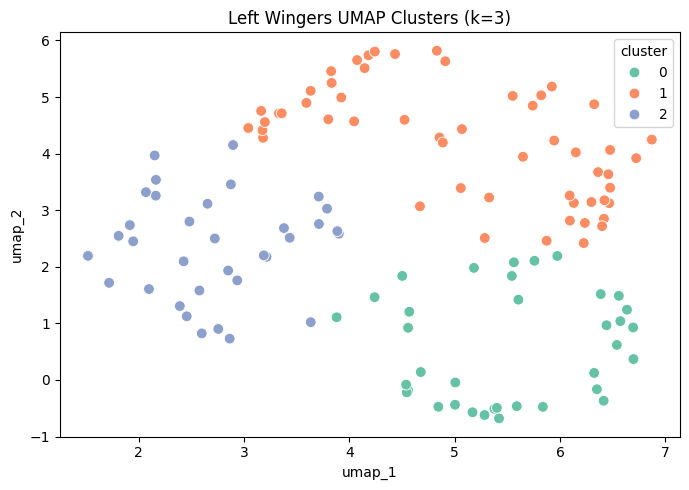

         passes_per_90  pass_accuracy  progressive_passes_per_90  \
cluster                                                            
0               32.723         73.101                      7.777   
1               18.813         72.503                      3.495   
2               23.173         69.336                      5.494   

         progressive_pass_accuracy  long_passes_per_90  long_pass_accuracy  \
cluster                                                                      
0                           58.251               4.065              40.520   
1                           55.170               1.622              38.897   
2                           52.278               2.732              34.026   

         key_passes_per_90  crosses_per_90  cross_accuracy  assists_per_90  \
cluster                                                                      
0                    1.272           1.835          29.017           0.141   
1                    0.628        

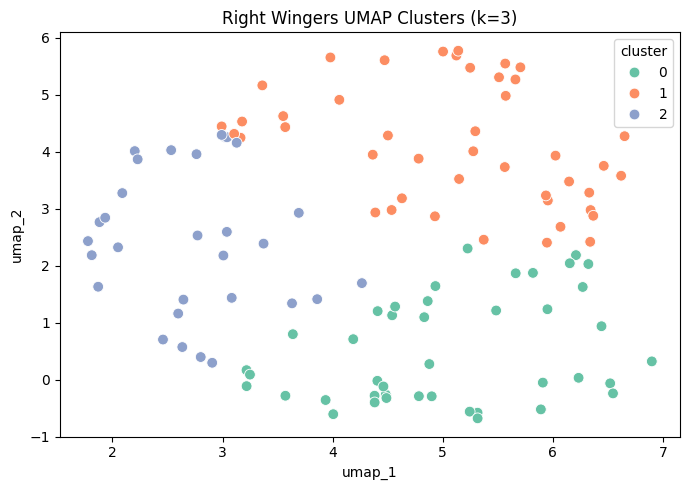

         passes_per_90  pass_accuracy  progressive_passes_per_90  \
cluster                                                            
0               31.217         71.726                      7.784   
1               19.657         71.442                      3.836   
2               23.469         69.284                      5.746   

         progressive_pass_accuracy  long_passes_per_90  long_pass_accuracy  \
cluster                                                                      
0                           56.807               4.281              38.299   
1                           53.290               1.732              36.019   
2                           51.640               2.841              35.689   

         key_passes_per_90  crosses_per_90  cross_accuracy  assists_per_90  \
cluster                                                                      
0                    1.163           2.096          26.367           0.157   
1                    0.717        

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import umap

# Parameters to share
n_neighbors = 15
min_dist = 0.1
n_clusters = 3  # you can change this after inspecting elbow/silhouette

# Role filters
LEFT_ROLES = ['left wing']
RIGHT_ROLES = ['right wing']

# Features
usable_features = [
    'passes_per_90', 'pass_accuracy', 'progressive_passes_per_90',
    'progressive_pass_accuracy', 'long_passes_per_90', 'long_pass_accuracy',
    'key_passes_per_90', 'crosses_per_90', 'cross_accuracy', 'assists_per_90',
    'passes_received_per_90',

    'shots_per_90', 'shots_on_target_per_90', 'shot_accuracy', 'goals_per_90',
    'first_time_shots_per_90', 'xg_per_90', 'headers_per_90', 'shots_outside_box_per_90',

    'progressive_runs_per_90', 'fouls_won_per_90', 'dribbles_per_90', 'dribble_success_rate',
    'successful_dribbles_per_90',

    'interceptions_per_90', 'blocks_per_90', 'clearances_per_90',
    'dribbled_past_per_90', 'pressures_per_90', 'ball_recoveries_per_90',

    'duels_per_90', 'duels_won_per_90', 'duel_success_rate',
    'fouls_made_per_90', 'yellow_cards_per_90', 'red_cards_per_90',

    'touches_per_90', 'average_position_x', 'average_position_y'
]

# Reusable function
def process_flank(df, flank_roles, flank_name, reducer, kmeans_model):
    print(f"\n=== {flank_name.upper()} WINGERS ===")

    flank_df = df[df["most_played_position"].str.lower().isin([r.lower() for r in flank_roles])].copy()
    X = flank_df[usable_features].dropna()
    if len(X) < n_clusters:
        print("Not enough players")
        return

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_umap = reducer.transform(X_scaled)
    labels = kmeans_model.predict(X_umap)

    flank_df = flank_df.loc[X.index].copy()
    flank_df['cluster'] = labels
    flank_df['umap_1'] = X_umap[:, 0]
    flank_df['umap_2'] = X_umap[:, 1]

    # Plot
    plt.figure(figsize=(7, 5))
    sns.scatterplot(data=flank_df, x='umap_1', y='umap_2', hue='cluster', palette='Set2', s=60)
    plt.title(f"{flank_name} Wingers UMAP Clusters (k={n_clusters})")
    plt.tight_layout()
    plt.show()

    # Averages
    print(flank_df.groupby("cluster")[usable_features].mean().round(3))

# Step 1: Fit UMAP & KMeans on combined wingers for shared space
all_wingers = df[df["most_played_position"].str.lower().isin(
    [r.lower() for r in LEFT_ROLES + RIGHT_ROLES])].copy()
X_all = all_wingers[usable_features].dropna()
scaler_all = StandardScaler()
X_all_scaled = scaler_all.fit_transform(X_all)

umap_model = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=2, random_state=42)
X_all_umap = umap_model.fit_transform(X_all_scaled)

kmeans_final = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans_final.fit(X_all_umap)

# Step 2: Apply same UMAP + KMeans to both flanks separately
process_flank(df, LEFT_ROLES, "Left", umap_model, kmeans_final)
process_flank(df, RIGHT_ROLES, "Right", umap_model, kmeans_final)



✅ Best combination:
n_neighbors=5, min_dist=0.05, k=3, silhouette=0.472


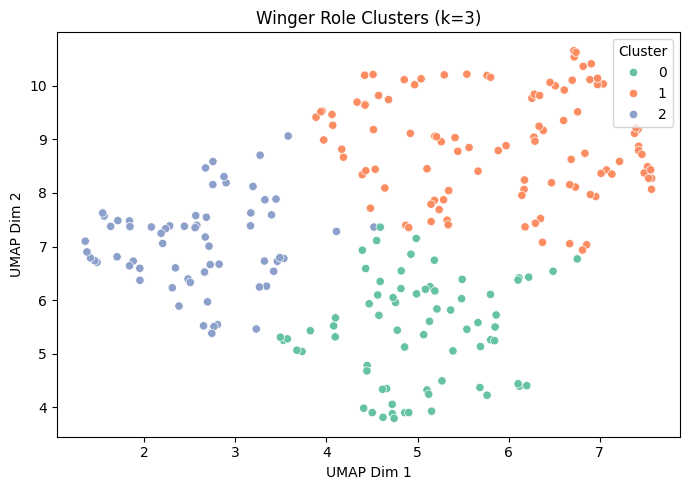

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import umap

import warnings

warnings.filterwarnings("ignore")
df["projected_y"] = df["average_position_y"].apply(
    lambda y: 80 - y if y < 40 else y)
target_position = 'winger'  # change as needed
group = df[df["position"].str.lower() == target_position.lower()].copy()



# Features
usable_features = [
    'passes_per_90', 'pass_accuracy', 'progressive_passes_per_90',
    'progressive_pass_accuracy', 'long_passes_per_90', 'long_pass_accuracy',
    'key_passes_per_90', 'crosses_per_90', 'cross_accuracy', #'assists_per_90',
    'passes_received_per_90',

    'shots_per_90', 'shots_on_target_per_90', 'shot_accuracy', #'goals_per_90',
    'first_time_shots_per_90', 'xg_per_90', 'headers_per_90', 'shots_outside_box_per_90',

    'progressive_runs_per_90', 'fouls_won_per_90', 'dribbles_per_90', 'dribble_success_rate',
    'successful_dribbles_per_90',

    'interceptions_per_90', 'blocks_per_90', 'clearances_per_90',
    'dribbled_past_per_90', 'pressures_per_90', 'ball_recoveries_per_90',

    'duels_per_90',
    'fouls_made_per_90',

    'touches_per_90', 'average_position_x', 'projected_y'
]
# Drop NAs and scale
X = group[usable_features].dropna()
if len(X) < 10:
    print("Not enough valid rows for clustering.")
    exit()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# UMAP grid search parameters
n_neighbors_list = [ 5, 10, 15, 50]
min_dist_list = [0.0, 0.05, 0.1, 0.5, 0.7]

best_score = -1
best_params = None
best_embedding = None
best_k = None
best_labels = None

# Try all combinations
for n in n_neighbors_list:
    for d in min_dist_list:
        reducer = umap.UMAP(n_neighbors=n, min_dist=d, n_components=2, random_state=42)
        X_umap = reducer.fit_transform(X_scaled)

        for k in range(3, 7):  # try k=2 to k=5
            kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
            labels = kmeans.fit_predict(X_umap)
            score = silhouette_score(X_umap, labels)


            
            if score > best_score:
                best_score = score
                best_params = (n, d)
                best_embedding = X_umap
                best_k = k
                best_labels = labels

# Report best
print("\n✅ Best combination:")
print(f"n_neighbors={best_params[0]}, min_dist={best_params[1]}, k={best_k}, silhouette={best_score:.3f}")

# Plot best result
plt.figure(figsize=(7, 5))
sns.scatterplot(x=best_embedding[:, 0], y=best_embedding[:, 1], hue=best_labels, palette='Set2')
plt.title(f"Winger Role Clusters (k={best_k})")
plt.xlabel("UMAP Dim 1")
plt.ylabel("UMAP Dim 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

In [4]:
# Add cluster labels to the original filtered dataframe (aligned by index)
group = group.loc[X.index].copy()  # ensure index alignment
group['cluster'] = best_labels

# Calculate average stats per cluster
cluster_means = group.groupby('cluster')[usable_features].mean()

# Set option to display all columns
pd.set_option('display.max_columns', None)

print("\n=== Average Stats by Cluster ===")
print(cluster_means)

# (Optional) Reset to default after printing if you want
pd.reset_option('display.max_columns')



=== Average Stats by Cluster ===
         passes_per_90  pass_accuracy  progressive_passes_per_90  \
cluster                                                            
0            24.945993      71.150193                   6.028416   
1            19.661039      70.453010                   4.018760   
2            31.661255      73.272875                   7.399940   

         progressive_pass_accuracy  long_passes_per_90  long_pass_accuracy  \
cluster                                                                      
0                        55.027607            2.923336           35.670369   
1                        52.628781            2.084143           36.628958   
2                        57.820744            3.776849           40.648437   

         key_passes_per_90  crosses_per_90  cross_accuracy  \
cluster                                                      
0                 0.789154        1.426233       26.117548   
1                 0.676984        1.376656      

In [5]:
for cluster_id, cluster_data in group.groupby('cluster'):
    print(f"\nCluster {cluster_id}:")
    for idx, row in cluster_data.iterrows():
        print(f"Player: {idx}, Name: {row['name']}, position {row['most_played_position']}")


Cluster 0:
Player: 2, Name: Sergio Gontán Gallardo, position Right Wing
Player: 23, Name: Rubén García Santos, position Left Wing
Player: 47, Name: Michael Krohn-Dehli, position Left Wing
Player: 49, Name: José Antonio Reyes Calderón, position Right Wing
Player: 50, Name: Víctor Machín Pérez, position Right Wing
Player: 55, Name: Fayçal Fajr, position Right Wing
Player: 64, Name: Federico Nicolás Cartabia, position Right Wing
Player: 74, Name: Pablo Sarabia García, position Right Wing
Player: 76, Name: Rubén Gracia Calmache, position Left Wing
Player: 111, Name: Hernán Arsenio Pérez González, position Right Wing
Player: 126, Name: Carlos Carmona Bonet, position Right Wing
Player: 159, Name: Pablo Hernández Domínguez, position Right Wing
Player: 209, Name: Markel Susaeta Laskurain, position Right Wing
Player: 243, Name: Pablo Daniel Piatti, position Left Wing
Player: 245, Name: Xabier Prieto Argarate, position Right Wing
Player: 254, Name: Santiago Mina Lorenzo, position Right Wing
Pla

In [6]:
role_map = {
    0: "Defensive Winger",
    1: "Direct Winger",
    2: "Creative Winger"
}

group = group.loc[X.index].copy()
group["role"] = [role_map[label] for label in best_labels]
group.head()

,player_id,name,minutes,most_played_position,position,passes_per_90,pass_accuracy,progressive_passes_per_90,progressive_pass_accuracy,long_passes_per_90,...,sweeper_claims_per_90,sweeper_clears_per_90,save_percentage,smother_success_rate,collection_success_rate,punch_success_rate,sweeper_success_rate,projected_y,cluster,role
2,6742,Sergio Gontán Gallardo,3311.02,Right Wing,winger,25.007400,64.891304,6.469306,50.420168,3.071561,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.786190,0,Defensive Winger
5,5687,Takashi Inui,2404.35,Left Wing,winger,21.149167,68.495575,4.491859,44.166667,2.732547,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.704476,1,Direct Winger
23,23943,Rubén García Santos,1948.52,Left Wing,winger,21.431651,66.594828,5.219346,53.982301,3.187034,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.190909,0,Defensive Winger
24,24070,Saúl Berjón Pérez,2280.40,Left Wing,winger,26.995264,57.309942,7.774952,39.593909,6.235748,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.060374,1,Direct Winger
30,10755,Jonathan Viera Ramos,4520.37,Left Wing,winger,38.943715,79.141104,9.457190,64.842105,3.583777,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.470041,2,Creative Winger


In [7]:
final = group.drop(columns = ['cluster', 'projected_y'])
final

,player_id,name,minutes,most_played_position,position,passes_per_90,pass_accuracy,progressive_passes_per_90,progressive_pass_accuracy,long_passes_per_90,...,collections_per_90,punches_per_90,sweeper_claims_per_90,sweeper_clears_per_90,save_percentage,smother_success_rate,collection_success_rate,punch_success_rate,sweeper_success_rate,role
2,6742,Sergio Gontán Gallardo,3311.02,Right Wing,winger,25.007400,64.891304,6.469306,50.420168,3.071561,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Defensive Winger
5,5687,Takashi Inui,2404.35,Left Wing,winger,21.149167,68.495575,4.491859,44.166667,2.732547,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Direct Winger
23,23943,Rubén García Santos,1948.52,Left Wing,winger,21.431651,66.594828,5.219346,53.982301,3.187034,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Defensive Winger
24,24070,Saúl Berjón Pérez,2280.40,Left Wing,winger,26.995264,57.309942,7.774952,39.593909,6.235748,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Direct Winger
30,10755,Jonathan Viera Ramos,4520.37,Left Wing,winger,38.943715,79.141104,9.457190,64.842105,3.583777,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Creative Winger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997,351521,Ezequiel Iván Lavezzi,1142.98,Left Wing,winger,20.079091,78.039216,3.464628,75.000000,1.968538,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Direct Winger
2000,6979,Stephan El Shaarawy,1106.23,Left Wing,winger,23.512289,82.698962,3.335654,53.658537,1.301718,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Direct Winger
2007,42430,Nicolas Maurice-Belay,1776.32,Left Wing,winger,40.279905,80.251572,8.815979,66.091954,2.127995,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Creative Winger
2008,3078,Abdoul Razzagui Camara,2096.90,Left Wing,winger,20.043874,70.663812,3.862845,55.555556,1.502218,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Defensive Winger


In [9]:
final.to_csv('wing_roles.csv', index=False)